<h3> SciPython/Practical_classes_3

<h4> Linear regression

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR']) #data description

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
d = boston_data['data']
d2 = d[:, [2,5]] #extract 2 features: INDUS, RM
target = boston_data['target']

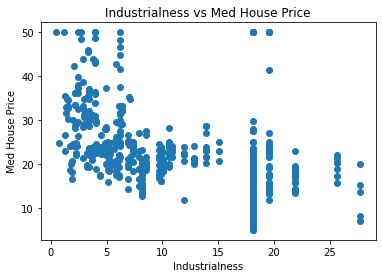

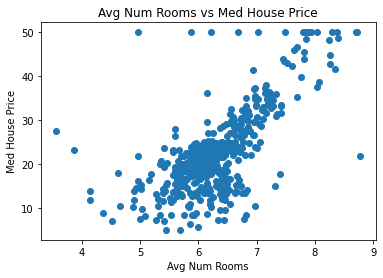

In [23]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

The loss function measures the average difference between the prediction $y$ and the actual value $t$. There are many functions of this type, one of the most popular is:

<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

For linear regression of 2 variables:    
<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

In [6]:
def loss_function(w1, w2, w0, X, t):
     """
     here, define a function that takes as arguments: weights (w1,w2,w0),
     data in the form of a list of lists (X) and target values (t),
     and which returns the value of the cost function.
     """
    pass

In [8]:
#example1 (should work after the implementation)
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [9]:
#example2
loss_function(-0.5, 8, -23, d2, target) #better

20.61716585276679

<h4> Exercise1: Complete the content of the above function.

Usually, at the beginning we do not have information what the parameters of the model should be; we can start with random values. So the question arises how to update them so that the loss function values are getting smaller and smaller? One of the most popular approaches (and the basis for other algorithms) is based on the Gradient Descent method. We calculate the derivative of the cost function on the considered parameters and then update them according to:

<center> 
$w_{new} = w_{old} - \alpha \cdot \frac{d LF}{dw}$

In [10]:
def update_weights(w1, w2, w0, X, t, alpha):
    """
     here, define a function that takes as arguments: weights (w1,w2,w0),
     data in the form of a list of lists (X), target values (t) and the learnig rate (alpha)
     and which returns the updated weights w1, w2, w0
    """
    pass

In [12]:
#example 
update_weights(3, 8, -1, d2, target, 0.001)

(2.1737704910276685, 7.628145982577075, -1.060154604743083)

<h4> Exercise2: Complete the content of the above function.

<h4> Exercise3: The goal is to build a linear regression model predicting $target$ based on $d2$. Start with the initial parameters 1, 1 and 1. Assuming $\alpha=0.001$, do 1000 updates of these parameters based on the gradient method. Draw the dependence of the cost function on the number of iterations. Perform analogous calculations for $\alpha=0.01$ and $\alpha=0.00001$. Comment your results

<h4> Exercise4: We usually don't know in advance how many times we need to modify the weights - when further updating has no effect. One solution to this problem is to check by what percentage the current weights change. Let's assume that if the change in the cost function is less than 0.1%, we stop the operation. How many steps should be taken to complete the previous task?

Obviously, there is an implementation of the linear regression method in Python

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model.fit(d2, target);

In [26]:
model.coef_ #weights for variables

array([-0.33471389,  7.82205511])

In [27]:
model.intercept_ #w0 parameter

-22.89831572922505

<h4> Exercise5: Compare these parameters with those obtained from Exercise3. Try to explain the observed discrepnacies.

In [28]:
r_sq = model.score(d2, target) #R2 for model
print(r_sq) 

0.5362984005856313


In [11]:
y_pred = model.predict(d2) #predictions
print(y_pred[:5])

[27.75850755 24.96067296 30.93672306 31.11074967 32.27623588]


<h3> What if the dependence is not linear?

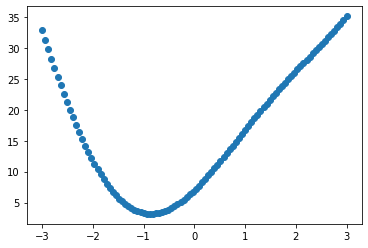

In [23]:
def non_linear(x):
    return 3*x**2+8*np.sin(x)+7

x = np.linspace(-3,3,100) #100 numbers from the [-3,3] range
y = non_linear(x)

plt.scatter(x,y)
plt.show()

In [24]:
x1 = x**2
x2 = np.sin(x)
X = np.vstack((x1, x2)).T #make a 2D table
target = y

In [25]:
w1 = 1
w2 = 1
w0 = 1

l = []

for i in range(10000):
    l.append(loss_function(w1, w2, w0, X, target))
    w1, w2, w0 = update_weigths(w1, w2, w0, X, target, 0.001)

In [26]:
w1, w2, w0

(3.0137576012588307, 7.9607443561805535, 6.926150356697879)

Conclusion: The linear method can also be used for non-linear relations.

<h3> Model parameters vs. hyperparameters


- model parameters ($w_1, w_2, w_0$)
- hyperparameters (e.g. $\alpha$) are external to the model

We usually divide the data into 2 or 3 groups - a training set, a validation set and a test set.

Generally:
- On the training set, we teach the model parameters using the gradient descent method.
- Using the validation set, we select the most optimal hyperparameters.
- We check the selected set of parameters and hyperparameters on the test set

<h4> Exercise6: Consider again the data $d2/target$.
    
- Divide them into three subsets - training (60%), validation (20%) and test (20%); define the appropriate in-built function for such as task.
- Test different values of $\alpha$ parameters on the validation set, on this basis choose one that you will use to train the model parameters on the training set.
- Finally, evaluate the cost function on the test set. Comment your results.

<h3> Supplementary materials

In [29]:
#pandas and standarization (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [30]:
#compare with the previous cell
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [31]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
